In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

In [2]:
df0=pd.read_csv("C:\Temp\cc_market_caps_nanx.csv", encoding='utf-8')
df0.set_index("Date", inplace=True)
df0

,bitcoin,auroracoin,bitbar,bullion,counterparty,dash,diamond,digibyte,digitalcoin,dogecoin,...,potcoin,primecoin,quark,reddcoin,ripple,unobtanium,vertcoin,worldcoin,zeitcoin,zetacoin
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-31,6023351178,3.296020e+07,219862.0000,367844.00000,5753075.000,2815062.0,32806,100533.000,405178.0000,35541929.00,...,322419.000,4264790.000,5.055530e+06,458918.0000,68458134.0,5.180200e+05,3569122.000,1.921177e+06,247917.0000,9.166490e+05
2014-04-01,6023351178,3.296020e+07,219862.0000,367844.00000,5753075.000,2815062.0,32806,100533.000,405178.0000,35541929.00,...,322419.000,4264790.000,5.055530e+06,458918.0000,68458134.0,5.180200e+05,3569122.000,1.921177e+06,247917.0000,9.166490e+05
2014-04-02,5506313797,2.545406e+07,184105.0000,440709.00000,4657472.000,2397479.0,30760,121315.000,327252.0000,28556987.00,...,363600.000,3474197.000,4.012646e+06,348021.0000,61931056.0,4.317000e+05,3161241.000,1.450420e+06,257935.0000,1.480542e+06
2014-04-03,5604036051,2.585888e+07,161011.0000,454590.00000,5430816.000,2494273.0,33829,87487.000,330810.0000,29951047.00,...,328570.000,4305800.000,3.784939e+06,324309.0000,62108287.0,4.605730e+05,3218626.000,1.652129e+06,226504.0000,1.392202e+06
2014-04-04,5641613449,2.199682e+07,216631.0000,454025.00000,6053031.000,2543398.0,37365,110267.000,345591.0000,29974151.00,...,352841.000,4111056.000,3.815776e+06,317457.0000,63275967.0,5.163760e+05,3120432.000,1.744193e+06,238665.0000,2.994057e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-21,18058074337,1.310225e+06,116491.0000,99229.93391,7843465.296,684882768.8,614712,2615834.453,262616.6307,27075953.11,...,3741437.651,1112965.929,7.473559e+05,634827.1816,258155726.5,4.621628e+05,1590712.995,8.159050e+05,288487.9457,2.787929e+05
2017-03-22,16877645842,1.256315e+06,110649.2346,85330.16485,8265941.613,725554965.5,584292,2698046.161,230741.4528,26403481.79,...,3719281.089,1065574.010,7.123237e+05,882319.4133,273464353.6,5.341917e+05,1670743.495,6.792269e+05,360620.3090,2.648963e+05
2017-03-23,16705852354,1.279106e+06,110077.3248,98247.94305,7565189.266,722319841.0,638354,2669872.604,255187.6532,26273554.84,...,3886012.630,1256068.660,7.094393e+05,873106.0511,359382691.1,5.391613e+05,1693695.794,7.483792e+05,360625.4967,2.917121e+05


In [3]:
#어느 날 t가 들어가면 t가 포함된 달의 첫날 구해주는 함수
def firsttime(t):
    today=datetime.strptime(t,'%Y-%m-%d')
    Month_first_time=datetime(today.year, today.month, 1)
    
    return Month_first_time.strftime('%Y-%m-%d')

def lasttime(t):
    today=datetime.strptime(t, '%Y-%m-%d')
    Month_first_time=datetime(today.year, today.month, 1)
    Month_last_time=Month_first_time-timedelta(1)
    
    return Month_last_time.strftime('%Y-%m-%d')

#Divisor 구해주는 함수. k는 시가총액 상위 k개, t는 datetime
def Divisor(k, t, startingvalue=1000):
    beta_list=np.ones(k) #프로젝트의 진행을 위해 beta=1 벡터
    k_market_cap=np.array(df0.loc[lasttime('2014-04-01')].sort_values(ascending=False)[0:k])
    divisor=np.dot(beta_list,k_market_cap)/1000
    
    return divisor

'''
#논문에서는 지난달의 마지막날의 시가총액 데이터를 시작점으로 한다고 
#하였으나 시작점(startingvalue=1000)은 2014년 4월 1일(데이터 수집 시점)

def Divisor(k, t, startingvalue=1000):
    beta_list=np.ones(k) #프로젝트의 진행을 위해 beta=1 벡터
    k_market_cap=np.array(df0.loc[lasttime('2014-04-01')].sort_values(ascending=False)[0:k])
    divisor=np.dot(beta_list,k_market_cap)/1000
    
    return divisor
'''

#CRIX 구해주는 함수
def CRIX(k, t, s=1, startingvalue=1000): #최적의 k에 대한 식이 나와야함
    beta_list=np.ones(k+s)
    #s추가.
    divisor=Divisor(k+s, t, startingvalue=1000)
    top_k_coin=df0.loc[lasttime(t)].sort_values(ascending=False).index[0:k+s]
    k_market_cap=np.array(df0.loc[t,top_k_coin])
    Crix_num=np.dot(beta_list,k_market_cap)
    
    return Crix_num/divisor

#모든 암호화폐에 대한 CRIX(k=kmax, beta=1)인 TMI 구하는 함수
def TMI(t, startingvalue=1000):
    K_market_cap=df0.loc[t].sum(axis=0)
    divisor=df0.loc['2014-04-01'].sum(axis=0)/startingvalue
    
    return K_market_cap/divisor
'''
#논문에서는 지난달의 마지막날의 시가총액 데이터를 시작점으로 한다고 
#하였으나 시작점(startingvalue=1000)은 2014년 4월 1일(데이터 수집 시점)

def TMI(t, startingvalue=1000):
    K_market_cap=df0.loc[t].sum(axis=0)
    divisor=df0.loc[lasttime(t)].sum(axis=0)/startingvalue
    
    return K_market_cap/divisor
'''
#시점 t와 시점 t-1에 대한 TMI의 로그 수익률
def epsilon_TMI(t, startingvalue=1000):
    t_1=datetime.strptime(t,'%Y-%m-%d')-timedelta(1)
    logreturn=np.log(TMI(t)/TMI(t_1.strftime('%Y-%m-%d')))
    return logreturn

#시점 t와 시점 t-1에 대한 CRIX 로그 수익률
def epsilon_CRIX(t,k,s=1,startingvalue=1000):
    t_1=datetime.strptime(t,'%Y-%m-%d')-timedelta(1)
    logreturn=np.log((CRIX(k,t,s,startingvalue))/CRIX(k,t_1.strftime('%Y-%m-%d'),s,startingvalue))
    return logreturn

#TMI(t)로그 수익률 와 CRIX(k,t) 로그 수익률 의 차이 (k는 변수, 우리가 정해줘야함.) 
def diff(t, k, startingvalue=1000):
    return epsilon_TMI(t,startingvalue)-epsilon_CRIX(t,k,1,startingvalue)

In [4]:
#입실론 헷 데이터 만들기 / TMI와 CRIX의 로그 수익률 차이에 대한 데이터
date_list=list(df0.index)
diff_df=pd.DataFrame(index=date_list, columns=np.arange(1, len(df0.columns)))

#결측치 제거, 전처리
for t in date_list:
    if t == '2014-03-31'or t=='2014-04-01':
        print(t)
        continue
    else:
        diff_list=[]
        for k in range(1,len(df0.columns)):
            diff_list.append(diff(t,k))
        diff_df.loc[t]=diff_list
        
print(diff_df)

2014-03-31
2014-04-01
                  1         2         3         4         5         6   \
2014-03-31       NaN       NaN       NaN       NaN       NaN       NaN   
2014-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2014-04-02 -0.002107 -0.002031 -0.001753 -0.001111 -0.000349 -0.000601   
2014-04-03  0.000076   0.00021  0.000104 -0.000053 -0.000053   0.00016   
2014-04-04 -0.000488 -0.000618  -0.00046 -0.000433  0.000227  0.000259   
...              ...       ...       ...       ...       ...       ...   
2017-03-21 -0.001817 -0.000669 -0.000096 -0.000077 -0.000085 -0.000036   
2017-03-22  0.002261  0.000525  0.000157  0.000106  0.000057   0.00013   
2017-03-23  0.005224  0.000229  0.000066  0.000066  0.000102  0.000062   
2017-03-24  0.006284  0.001846  0.000385  0.000096   0.00005  0.000026   
2017-03-25 -0.004291  -0.00012  0.000286  0.000141  0.000144  0.000171   

                  7         8         9         10  ...        21        22  \
2014-03-31

In [5]:
#분기별로 나누기 
#데이터 추출
diff_2014_3Q=diff_df.loc['2014-04-02':'2014-07-31', :]
diff_2014_4Q=diff_df.loc['2014-08-01':'2014-10-31', :]
diff_2015_1Q=diff_df.loc['2014-11-01':'2015-01-31', :]
diff_2015_2Q=diff_df.loc['2015-02-01':'2015-04-31', :]
diff_2015_3Q=diff_df.loc['2015-05-01':'2015-07-31', :]
diff_2015_4Q=diff_df.loc['2015-08-01':'2015-10-31', :]
diff_2016_1Q=diff_df.loc['2015-11-01':'2016-01-31', :]
diff_2016_2Q=diff_df.loc['2016-02-01':'2016-04-31', :]
diff_2016_3Q=diff_df.loc['2016-05-01':'2016-07-31', :]
diff_2016_4Q=diff_df.loc['2016-08-01':'2016-10-31', :]
diff_2017_1Q=diff_df.loc['2016-11-01':'2017-01-31', :]
diff_df_list=[diff_2014_3Q,diff_2014_4Q,diff_2015_1Q,diff_2015_2Q,diff_2015_3Q,diff_2015_4Q,
             diff_2016_1Q, diff_2016_2Q, diff_2016_3Q, diff_2016_4Q, diff_2017_1Q]


In [6]:
#KDE optimal bandwidth selection
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
def optimal_bandwidth(df):
    X=np.array(df.iloc[:,0]).reshape(-1,1) #k1=1, beta=1
    x_d=np.linspace(-1.5, 1.5, 1000)[:, np.newaxis]
    bandwidth=np.arange(0.001, 2, 0.001)
    sklearn_kde=KernelDensity(kernel='epanechnikov')
    grid=GridSearchCV(sklearn_kde, {'bandwidth' : bandwidth})
    grid.fit(X)

    sklearn_kde = grid.best_estimator_
    log_dens = sklearn_kde.score_samples(x_d)
    
    return sklearn_kde.bandwidth

In [7]:
#KDE function / 커널 확률 밀도 추정하는 함수 구현
def epanechnikov_kernel(u):
    return ((0.75/np.sqrt(5))*(1-((u**2)/5)))
    
def kde(x_lst,lower=-1, upper=1, h=0.002):
    res_sum=np.zeros(10000)
    x_d=np.linspace(lower, upper, 10000)
    for xi in x_lst:
        kernels = np.array([epanechnikov_kernel((np.array(x-xi))/h) for x in x_d])
        kernels = np.where(kernels<0, 0, kernels)
        res_sum += kernels    
    density_res=res_sum/(len(x_lst)*h)
    return density_res

In [8]:
#데이터에 따른 확률 밀도 함수 추정
def makepdf(df, lower=-1, upper=1):
    x_bound=np.linspace(lower, upper, 10000)
    xi=list(df.iloc[:, 0])
    pdf=pd.Series(kde(xi,lower,upper,h=optimal_bandwidth(df)), index=x_bound)
    return pdf

In [9]:
#근사값 찾기 함수
def near_number(value, lst):
    near_num, min_num=0, 1
    for n in lst:
        res=abs(n-value)
        if res<min_num:
            min_num=res
            near_num=n
    return near_num

In [12]:
#다음 분기에 사용할 최적의 K를 AIC 기준을 통해 찾는 함수
def AIC_optimal_k(df):
    AIC_lst=np.array([])
    pdf=makepdf(df)
    
    for k in range(len(df.columns)):
        x_input=list(df.iloc[:,k])
        s=(k+1)-1
        likelihood=np.array([])
        
        for i in range(len(x_input)):
            x_approximate=near_number(x_input[i], pdf.index)
            likelihood=np.append(likelihood, pdf[x_approximate])
        
        res=-2*np.log(np.prod(likelihood))+2*s
        AIC_lst=np.append(AIC_lst, res)
        
    return np.argmin(AIC_lst)+1

In [14]:
optimal_k_list=[]
optimal_k_df=pd.DataFrame()
for diff_df in diff_df_list:
    optimal_k_list.append(AIC_optimal_k(diff_df))
    
optimal_k_df['k']=pd.DataFrame(optimal_k_list)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [        -inf         -inf 127.28637522 ... -23.69975311 -23.71186825
 -23.72397732]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [        -inf         -inf         -inf ... -18.01967375 -18.02888523
 -18.0380921 ]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: On

In [15]:
startdate=[datetime(2014,8,1), datetime(2014,11,1), datetime(2015,2,1), datetime(2015,5,1), datetime(2015,8,1), datetime(2016,11,1),
           datetime(2016,2,1), datetime(2016,5,1), datetime(2016,8,1), datetime(2016,11,1), datetime(2017,2,1)]
enddate=[datetime(2014,10,31), datetime(2015,1,31), datetime(2015,4,30), datetime(2015,7,31), datetime(2016,1,31), datetime(2016,1,31),
           datetime(2016,4,30), datetime(2016,7,31), datetime(2016,10,31), datetime(2017,1,31), datetime(2017,4,30)]
optimal_k_df['Start']=startdate
optimal_k_df['End']=enddate

In [16]:
optimal_k_df

,k,Start,End
0,1,2014-08-01,2014-10-31
1,1,2014-11-01,2015-01-31
2,2,2015-02-01,2015-04-30
3,3,2015-05-01,2015-07-31
4,1,2015-08-01,2016-01-31
5,2,2016-11-01,2016-01-31
6,2,2016-02-01,2016-04-30
7,4,2016-05-01,2016-07-31
8,2,2016-08-01,2016-10-31
9,3,2016-11-01,2017-01-31


In [17]:
a=optimal_k_df.loc[optimal_k_df['Start']==datetime(2014,8,1)]['k'].values[0]
CRIX(a, '2014-08-25')

1060.0636640099424

,CRIX_value
2014-08-01,1255.471615
2014-08-02,1244.126580
2014-08-03,1238.586482
2014-08-04,1239.869554
2014-08-05,1231.172223
...,...
2017-03-21,2958.494605
2017-03-22,2784.441142
2017-03-23,2771.013159
2017-03-24,2553.270030


<function matplotlib.pyplot.show(close=None, block=None)>

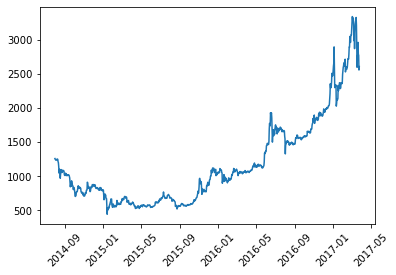

In [18]:
#CRIX 데이터프레임 만들기
CRIX_list=[]
td_list=[]
for t in df0.index:
    td=datetime.strptime(t,'%Y-%m-%d')
    for start, end in zip(optimal_k_df['Start'], optimal_k_df['End']):
        if td>=start and td<=end:
            k_value=optimal_k_df[optimal_k_df.Start==start]['k'].values[0]
            CRIX_value = CRIX(k_value, t, s=1, startingvalue=1000)
            CRIX_list.append(CRIX_value)
            td_list.append(td)

CRIX_df=pd.DataFrame({'CRIX_value':CRIX_list}, index=td_list)
CRIX_log_df=pd.DataFrame({'Log_CRIX_value':np.log(CRIX_list)}, index=td_list)
display(CRIX_df)

plt.plot(CRIX_df)
plt.xticks(rotation=45)
plt.show

In [19]:
df0.index

Index(['2014-03-31', '2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
       '2014-04-05', '2014-04-06', '2014-04-07', '2014-04-08', '2014-04-09',
       ...
       '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20',
       '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-25'],
      dtype='object', name='Date', length=1091)